# CLASSIFICATION PRACTISE saved_df.pkl

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_pickle("saved_df.pkl")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

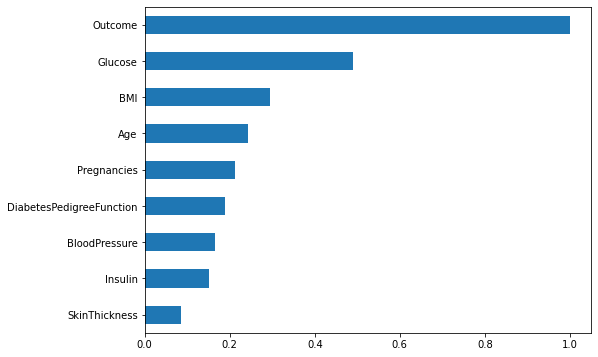

In [4]:
df.corr()['Outcome'].sort_values().plot.barh(figsize=(8,6))

In [5]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

## LOGISTIC REGRESSION

In [9]:
log_model = LogisticRegression()

In [10]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = log_model.predict(X_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[122,  24],
       [ 31,  36]], dtype=int64)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



## KNN

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[122,  24],
       [ 31,  36]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



## DT

In [16]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [17]:
dt_model=DecisionTreeClassifier().fit(X_train, y_train)

In [18]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[74, 20],
       [24, 24]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        94
           1       0.55      0.50      0.52        48

    accuracy                           0.69       142
   macro avg       0.65      0.64      0.65       142
weighted avg       0.68      0.69      0.69       142



## RF

In [20]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [21]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[81, 13],
       [24, 24]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        94
           1       0.65      0.50      0.56        48

    accuracy                           0.74       142
   macro avg       0.71      0.68      0.69       142
weighted avg       0.73      0.74      0.73       142



## XGBOOST

In [23]:
from xgboost import XGBClassifier

In [24]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [25]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



## SVM

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
svm_model = SVC().fit(X_train, y_train)

In [29]:
y_pred = svm_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[83, 11],
       [19, 29]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        94
           1       0.72      0.60      0.66        48

    accuracy                           0.79       142
   macro avg       0.77      0.74      0.75       142
weighted avg       0.78      0.79      0.78       142



## GRIDSEARCH with SVM

In [31]:
svm = SVC()

In [32]:
svm_params = {"kernel": ["linear","rbf", "poly", "sigmoid"]}

In [33]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


In [34]:
svm_cv_model.best_params_

{'kernel': 'linear'}

## SECOND GRIDSEARCH with SVM

In [36]:
svm = SVC(kernel="linear")

In [37]:
svm_params = {"C": [0.1,0.5,1,10,20,50]}

In [38]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [39]:
svm_cv_model.best_params_

{'C': 0.1}

In [40]:
svm_tuned_3 = SVC(C = 0.1, kernel="rbf").fit(X_train, y_train)

In [41]:
svm_new = SVC(C = 0.5, kernel="rbf").fit(X_train, y_train)

In [42]:
y_pred = svm_new.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[86,  8],
       [19, 29]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        94
           1       0.78      0.60      0.68        48

    accuracy                           0.81       142
   macro avg       0.80      0.76      0.77       142
weighted avg       0.81      0.81      0.80       142

